# Grid Sampling – Compressed Measurement – 45 Positions

This notebook presents subsampling results for nano-FTIR interferograms reconstructed using different strategies.

---

## 1. Objective

Explore the effect of sampling density and method (grid, equidistant, white-light, or random) on the reconstruction quality and SNR evaluation of nano-FTIR spectra.

## 2. Load Data

Load the relevant interferogram dataset and define reconstruction parameters.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq, rfft, ifft, fft2
from scipy.io import loadmat
from scipy.stats import kde
from matplotlib import colors
from scipy.signal import blackman


In [2]:
spacialsmoothed1 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_06112020_2040.mat ') 
Reko1=spacialsmoothed1["RekoCSspatialsmoothed"]
fulldata = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_full_02.11.2020_14.23.48.mat ') 
data_full=fulldata["data_full"]


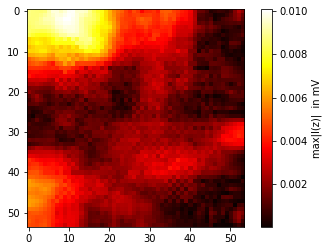

In [30]:
zweiD = np.zeros((54,54))
for i in range (0,54):
    for j in range (0,54):
        zweiD[i,j]= abs(Reko1[i,j,200])  

plt.imshow(zweiD, cmap='hot', interpolation='none')
cbar=plt.colorbar()
cbar.set_label('max|I(z)|  in mV')
plt.show()
datafull0 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_full_02.11.2020_14.23.48.mat')

datafull=datafull0["data_full"]
datafull.shape
zweiDb = np.zeros((54,54))

    for j in range (0,54):
        zweiDb[i,j]= abs(datafull[i,j,200])  

plt.title('Voller Datensatz')
plt.xlabel('Pixel')

plt.imshow(zweiDb, cmap='hot', interpolation='none')
cbar=plt.colorbar()
cbar.set_label('max|I(z)|  in mV')
plt.show()


In [4]:
def Filter(Filtertype, Resolution): #Resolution=Length complex data
    if Filtertype==1: #blackmann-Harris-3-Term
        b=np.zeros(400*3)
        Filtered=np.zeros(400*3)
        for z in range (199):
            b[z]=np.cos(np.pi*(z)/(Resolution/2))
            Filtered [z]= 0.42323 + 0.49755*b[z] + 0.07922*np.cos(2*np.pi*(z)/(Resolution/2))  
            #b[z]=np.cos(np.pi*(z-Resolution/2))/(Resolution/2))
            #Filtered [z]= 0.42323 + 0.49755*b[z] + 0.07922*np.cos(2*np.pi*(z-Resolution/2))/(Resolution/2)) 
        for z in range (200,400):
            b[z+800]=np.cos(np.pi*(z)/(Resolution/2))
            Filtered [z+800]= 0.42323 + 0.49755*b[z+800] + 0.07922*np.cos(2*np.pi*(z+800)/(Resolution/2))  
        
        return Filtered
    if filtertype==2: #blackmann with gap
        gap = 0.4
        return blackManFn(z/Resolution, gap)

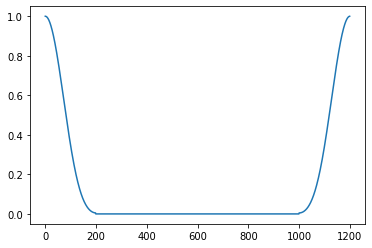

In [5]:
plt.plot(Filter(1,400))

In [6]:
def blackManFn(x, gap):
    if x >=gap and x <= (1 - gap):
        a=np.pi*((x - gap)*(0.5/(-gap + 0.5)) - 1/2)/(1/2)
        b=0.42323 + 0.49755*np.cos(a) + 0.07922*np.cos(2*a)
        return b
    if   x <=  gap or x >= 1 - gap:
        return 0.0049


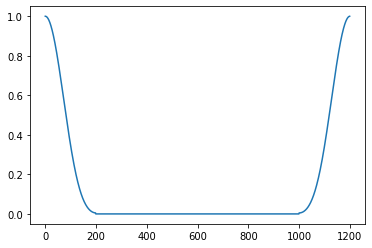

In [7]:
plt.plot(Filter(1,400))
#plt.plot( Filter(1,400*zerofilling))

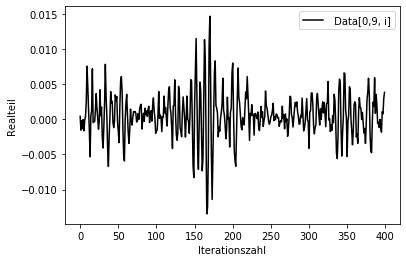

In [8]:
plt.plot(np.real(Reko1[0,9]), 'k-',label=' Data[0,9, i]')
#plt.plot(np.real(Reko2[0,9]), 'b-',label='Interferogramm Reko Data[0,9, i]')
#plt.plot(np.real(Reko3[0,9]), 'r-',label='Interferogramm Reko Data[0,9, i]')

plt.legend()

#plt.axis([0.00115, 0.0013, 0,0.20 ])
plt.xlabel('Ierationszahl')
plt.ylabel('Realteil')

plt.show() 

(0.0006169230393904393-0.0018424245002981558j)


Text(0, 0.5, 'abs Amplitude')

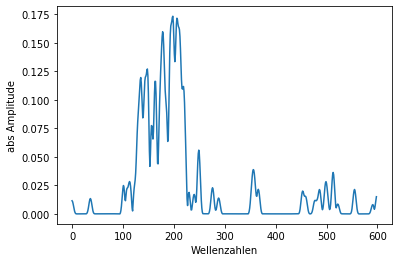

In [13]:
zerofilling=3

RekoA=np.zeros((400,),dtype = complex)

zerof=np.zeros((800,),dtype = complex)
'''wnZFVals = 
  Table[(j - 
      1)*1/(2*(zerofilling + 1)*
       importDataScanS/10000.), {j, (zerofilling + 1)*dimDat[[2]]}];'''
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for i in range (0,399):
            RekoA[i]=(Reko1[25,37, i])
        
offsetReko1 = np.mean(RekoA[369:399,])               # alternativ [370: 400,]? nein!!
print(offsetReko1)
offsetReko=np.ones((400,),dtype = complex)*offsetReko1
offReko= np.subtract(RekoA,offsetReko)

offRekozerofilling= np.concatenate([offReko,zerof])
wrapindexReko =230                                    #eventuell 299? wg mathematica
wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links

#plt.plot(np.zeros(1200))
        #filtering
filReko = Filter(1,400)*wrapReko
#print(filReko)
#plt.plot(np.absolute(filReko))
ftReko = fft(filReko)
ftRekohalve=ftReko[0:599]
plt.plot(np.absolute(ftRekohalve))


#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen')
plt.ylabel('abs Amplitude')
#pos zwischen 800 und 900 wnVal

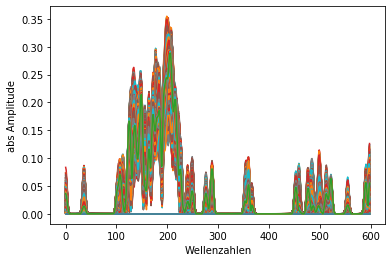

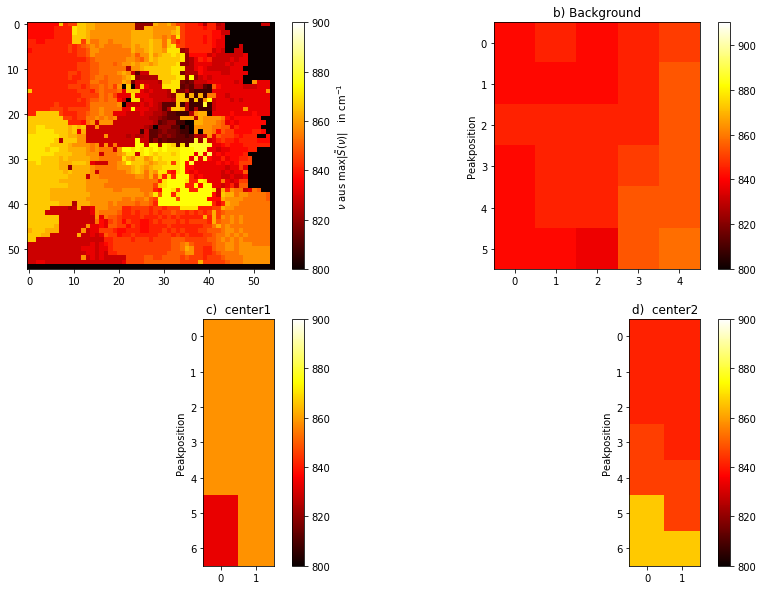

In [31]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))
'''wnZFVals = 
  Table[(j - 
      1)*1/(2*(zerofilling + 1)*
       importDataScanS/10000.), {j, (zerofilling + 1)*dimDat[[2]]}];'''
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko1[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        #print(offsetReko1)
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        #print(np.subtract(RekoA,-offsetReko)) 
        #plt.plot (np.real(offReko))
        offRekozerofilling= np.concatenate([offReko,zerof])
        #print(offRekozerofilling)
        #plt.plot (np.real(offRekozerofilling))
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #print (wrapReko)
        #plt.plot (np.real(wrapReko))
        plt.plot(np.zeros(600))
        #filtering
        filReko = Filter(1,400)*wrapReko
        #print(filReko)
        #plt.plot(np.absolute(filReko))
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]
plt.plot(np.absolute(ftRekohalve))

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen')
plt.ylabel('abs Amplitude')
#pos zwischen 800 und 900 wnVal

plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.figure(figsize=(14,10))

RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()


plt.subplot(221)
plt.imshow(pos_Reko_Max,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('  ')
cbar=plt.colorbar()
cbar.set_label(r'$\nu$ aus max|$ \tilde{S}(\nu $)|   in cm$^{-1}$')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('')


plt.subplot(222) 
plt.imshow(posback1Reko,vmin=800, vmax=910, cmap='hot', interpolation='none') #vmin=750, vmax=900
plt.title('b) Background')
#plt.legend()
plt.xlabel('')
plt.ylabel('Peakposition')
plt.colorbar()

plt.subplot(223)
plt.imshow(RekoA,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('c)  center1')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()
plt.subplot(224)
plt.imshow(RekoA2,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('d)  center2')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()
#plt.savefig("E3Indent_Peakposition.pdf")

NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

#SNR1[0]=SNRposReko
#SNR2[0]=SNRposReko2

Text(0, 0.5, '')

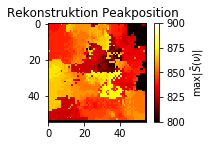

In [26]:
plt.subplot(221)
plt.imshow(pos_Reko_Max,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('Rekonstruktion Peakposition  ')
cbar=plt.colorbar()
cbar.set_label(r'max|$ \tilde{S}(\nu $)|')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('')


## 6. Results and Conclusion

- Subsampling strategies offer significant reduction in acquisition time.
- Reconstruction quality depends on both sampling pattern and target feature size.
- Grid and equidistant sampling preserve broader structures well, while random and white-light techniques vary depending on SNR.
